<a href="https://colab.research.google.com/github/HiroshiATakano/Python/blob/main/Level2_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os

path = os.getcwd()

try:
  os.chdir(path + '/drive/My Drive/QC_Kentei')
except:
  pass

os.getcwd()

'/content/drive/My Drive/QC_Kentei'

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 27.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a209600b625fc6fad675cdeb563981ea833e11071b14849171c04dcfd40c1dd4
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

import gspread

# 認証のためのコード
from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
url ="https://docs.google.com/spreadsheets/d/1Y7lmoNn7CoScUpjWNmBAnL90YTLzdtOUef8EMoeIbTY/edit?usp=sharing"
ss = gc.open_by_url(url)

# データを取得する。（リストとして）
st = ss.worksheet("Sheet2")
list_of_lists = st.get_all_values()
df = pd.DataFrame(list_of_lists)
df = df.T

# 1行目を列名に設定
df.columns = df.iloc[0]
# 1行目を削除
df = df.drop(df.index[0])

# インデックスをリセット
df.reset_index(drop=True, inplace=True)
y = df['Valor de medición'].astype("float")



##15.1

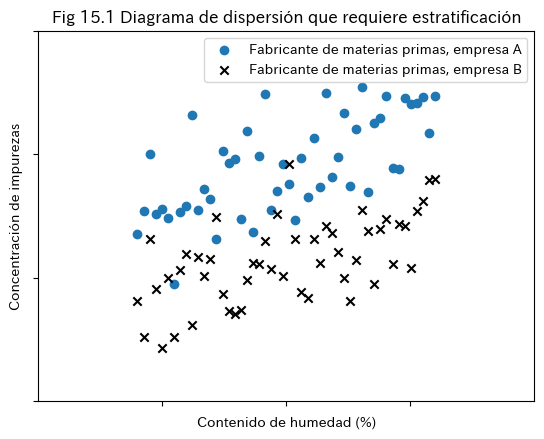

In [ ]:
# Fig 15.1

# データ数
n = 50

# xの範囲と平均
x_min, x_max = 4.0, 16.0
x_mean = (x_min + x_max) / 2

# x2の範囲と平均
x2_min, x2_max = 4.0, 16.0
x2_mean = (x2_min + x2_max) / 2

# yの範囲と平均
y_min, y_max = 2.0, 27.0
y_mean = (y_min + y_max) / 2

# y2の範囲と平均
y2_min, y2_max = 1.0, 20.0
y2_mean = (y2_min + y2_max) / 2

# 相関係数
correlation = 0.2
correlation2 = 0.2

# xを一様分布から生成
x = np.linspace(x_min, x_max, n)

# xを一様分布から生成
x2 = np.linspace(x2_min, x2_max, n)

# yを生成
y = y_mean + correlation * (y_max - y_mean) / (x_max - x_mean) * (x - x_mean) + np.random.normal(0, 1.5, n)

# yを生成
y2 = y2_mean + correlation2 * (y2_max - y2_mean) / (x2_max - x2_mean) * (x2 - x2_mean) + np.random.normal(0, 1.5, n)

# 散布図をプロット
plt.scatter(x, y, label="Fabricante de materias primas, empresa A")
plt.scatter(x2, y2, marker='x',color='k', label="Fabricante de materias primas, empresa B")
plt.xlim(0,20)
plt.ylim(5,20)
plt.xlabel("Contenido de humedad (%)")
plt.ylabel("Concentración de impurezas")
plt.xticks([5,10,15],[])
plt.yticks([5,10,15,20],[])
plt.title('Fig 15.1 Diagrama de dispersión que requiere estratificación')
plt.legend()
plt.savefig("Graph2/Fig_15-1.png", format="png", dpi=300)

df1 = pd.DataFrame({'x':x,'y':y,'c':'A'})
df2 = pd.DataFrame({'x':x2,'y':y2,'c':'B'})
df = pd.concat([df1,df2])
df.reset_index(inplace=True, drop=True)
df.to_excel('Data2/15-1.xlsx')


### フィッシャーのZ変換

Sample Correlation Coefficient: 0.647
95% Confidence Interval for the Correlation Coefficient: (0.516, 0.748)


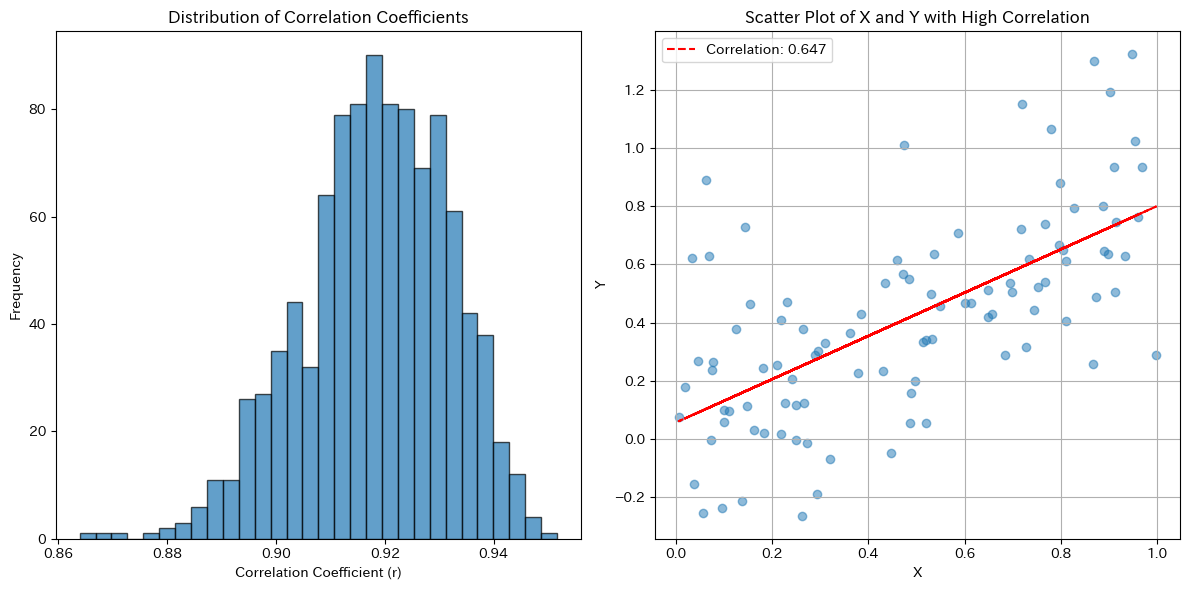

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# サンプル設定
np.random.seed(0)
n = 100  # サンプルサイズ
num_simulations = 1000  # シミュレーションの回数

# 相関係数の保存用リスト
r_values = []

for _ in range(num_simulations):
    # データの生成
    x = np.random.rand(n)
    y = 0.8 * x + np.random.normal(0, 0.1, n)  # 高い相関を持たせる

    # 相関係数の計算
    r = np.corrcoef(x, y)[0, 1]
    r_values.append(r)

# 相関係数の分布をヒストグラムで表示
plt.figure(figsize=(12, 6))

# ヒストグラムのプロット
plt.subplot(1, 2, 1)
plt.hist(r_values, bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Correlation Coefficients')
plt.xlabel('Correlation Coefficient (r)')
plt.ylabel('Frequency')

# 例のサンプルでの相関係数と信頼区間の計算
x = np.random.rand(n)
y = 0.8 * x + np.random.normal(0, 0.3, n)
r = np.corrcoef(x, y)[0, 1]

# フィッシャーのz変換
z = 0.5 * np.log((1 + r) / (1 - r))

# 標準誤差の計算
se = 1 / np.sqrt(n - 3)

# 信頼区間の計算
confidence_level = 0.95
alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1 - alpha / 2)

z_lower = z - z_critical * se
z_upper = z + z_critical * se

# z変換から相関係数に戻す
r_lower = (np.exp(2 * z_lower) - 1) / (np.exp(2 * z_lower) + 1)
r_upper = (np.exp(2 * z_upper) - 1) / (np.exp(2 * z_upper) + 1)

print(f"Sample Correlation Coefficient: {r:.3f}")
print(f"95% Confidence Interval for the Correlation Coefficient: ({r_lower:.3f}, {r_upper:.3f})")

# 相関係数の散布図と回帰線
plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot of X and Y with High Correlation')
plt.xlabel('X')
plt.ylabel('Y')

# 相関係数のラインを描画
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red', linestyle='--', label=f'Correlation: {r:.3f}')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-8-69a2e62e153d>:9: RuntimeWarning: divide by zero encountered in arctanh
  z_values = np.arctanh(r_values)


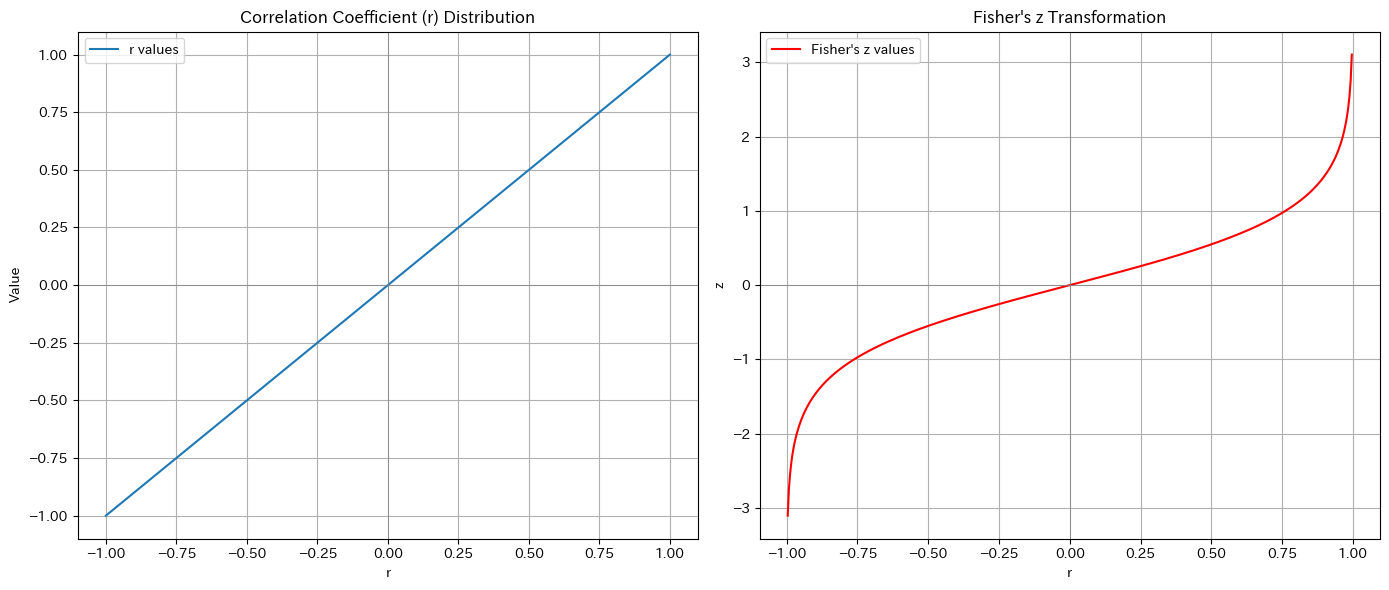

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate a range of r values from -1 to 1
r_values = np.linspace(-1, 1, 500)

# Fisher's z transformation
z_values = np.arctanh(r_values)

# Plotting the original r values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(r_values, r_values, label='r values')
plt.title('Correlation Coefficient (r) Distribution')
plt.xlabel('r')
plt.ylabel('Value')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.legend()

# Plotting the z values after Fisher's transformation
plt.subplot(1, 2, 2)
plt.plot(r_values, z_values, label='Fisher\'s z values', color='r')
plt.title('Fisher\'s z Transformation')
plt.xlabel('r')
plt.ylabel('z')
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


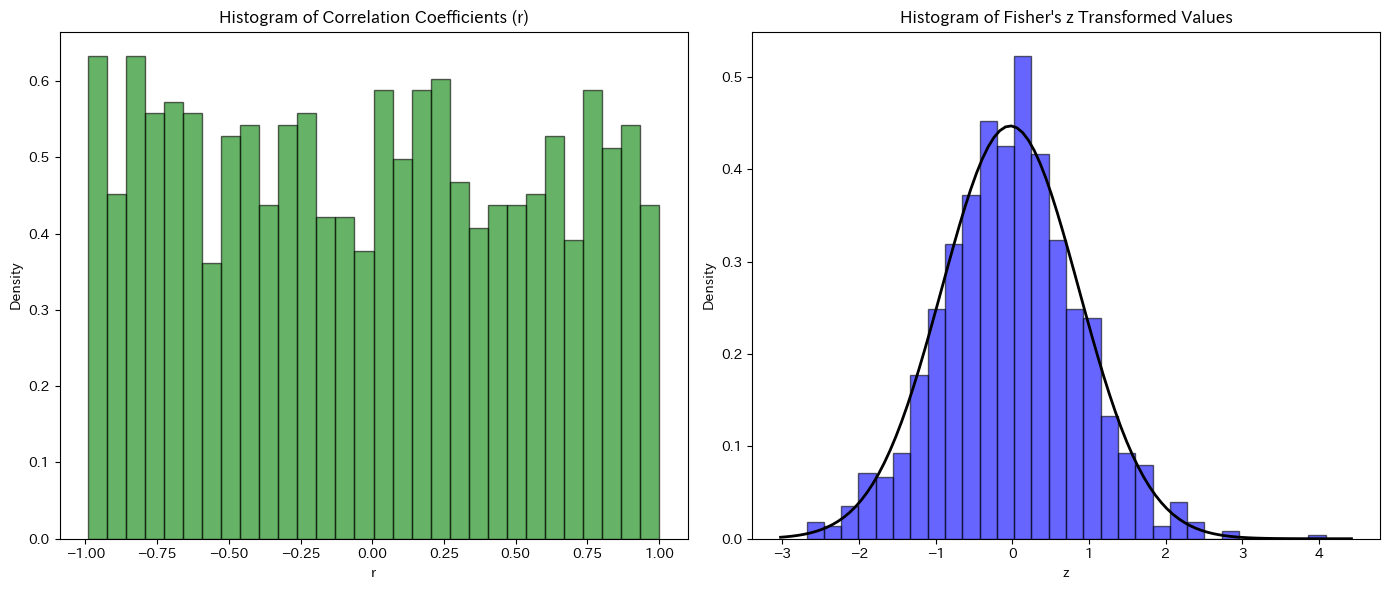

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate random correlation coefficients r
np.random.seed(42)
r_values = np.random.uniform(-1, 1, 1000)

# Apply Fisher's z transformation
z_values = np.arctanh(r_values)

# Plot histogram of r values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(r_values, bins=30, density=True, alpha=0.6, color='g', edgecolor='black')
plt.title('Histogram of Correlation Coefficients (r)')
plt.xlabel('r')
plt.ylabel('Density')

# Plot histogram of z values with a normal distribution fit
plt.subplot(1, 2, 2)
plt.hist(z_values, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')

# Plot normal distribution for comparison
mean, std = np.mean(z_values), np.std(z_values)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Histogram of Fisher\'s z Transformed Values')
plt.xlabel('z')
plt.ylabel('Density')

# Show the plot
plt.tight_layout()
plt.show()


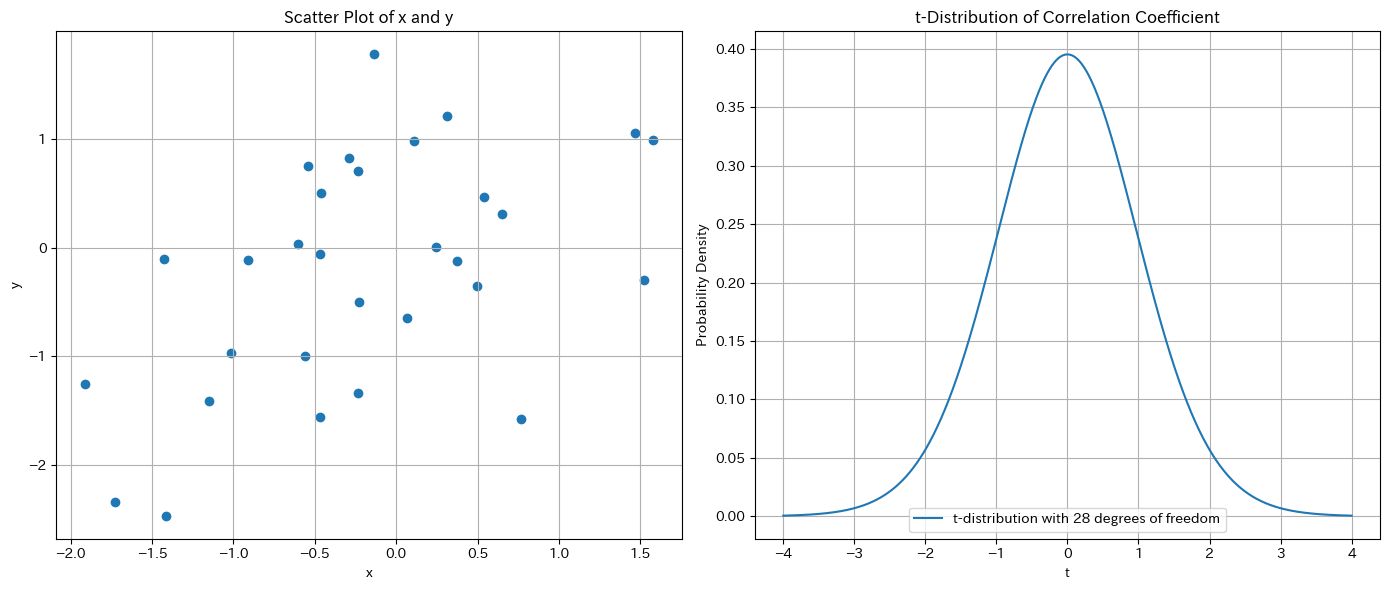

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate random data for x and y
np.random.seed(42)
n = 30  # Number of data points
x = np.random.normal(0, 1, n)
y = 0.5 * x + np.random.normal(0, 1, n)

# Calculate correlation coefficient
r = np.corrcoef(x, y)[0, 1]

# Degrees of freedom
dof = n - 2

# Generate the t-distribution with the calculated degrees of freedom
t_dist = np.linspace(-4, 4, 1000)
pdf = stats.t.pdf(t_dist, dof)

# Plot the scatter plot of x and y
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.title('Scatter Plot of x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Plot the t-distribution
plt.subplot(1, 2, 2)
plt.plot(t_dist, pdf, label=f't-distribution with {dof} degrees of freedom')
plt.title('t-Distribution of Correlation Coefficient')
plt.xlabel('t')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


##15.2

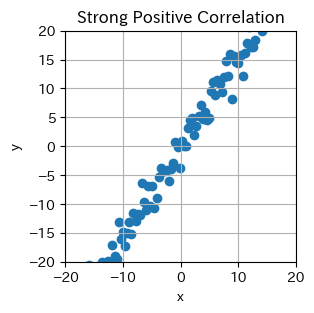

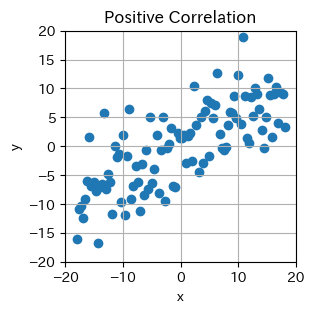

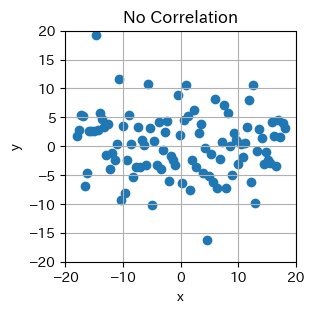

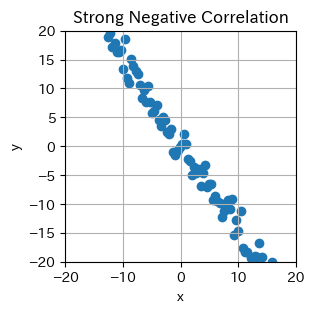

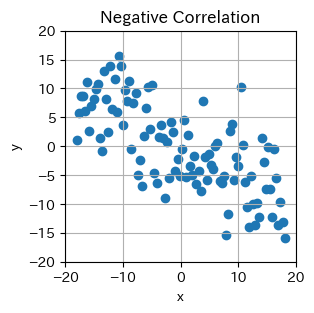

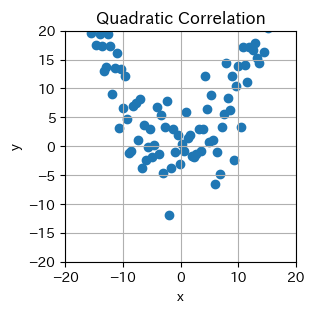

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Number of data points
n = 100

# Generate data for different types of correlations
x = np.linspace(-18, 18, n)
strong_positive_corr = 1.5 * x + np.random.normal(0, 2, n)
positive_corr = 0.5 * x + np.random.normal(0, 5, n)
no_corr = np.random.normal(0, 5, n)
strong_negative_corr = -1.5 * x + np.random.normal(0, 2, n)
negative_corr = -0.5 * x + np.random.normal(0, 5, n)
quadratic_corr = x**2*0.1 + np.random.normal(0, 5, n)

# Define plot limits
plot_limits = [-20, 20]

# Define a function to plot each correlation with 1:1 aspect ratio
def plot_correlation(x, y, title):
    plt.figure(figsize=(3, 3))
    plt.scatter(x, y)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(plot_limits)
    plt.ylim(plot_limits)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()

# Plotting each correlation type
plot_correlation(x, strong_positive_corr, 'Strong Positive Correlation')
plot_correlation(x, positive_corr, 'Positive Correlation')
plot_correlation(x, no_corr, 'No Correlation')
plot_correlation(x, strong_negative_corr, 'Strong Negative Correlation')
plot_correlation(x, negative_corr, 'Negative Correlation')
plot_correlation(x, quadratic_corr, 'Quadratic Correlation')




##15.3

製品Pの製造工程において、圧縮強度と引っ張り強さは重要な管理項目となっている。最近の生産量より、ランダムに n= 52 のサンプルを抜き取り、それぞれのサンプルから圧縮強度 (x) と引っ張り強さ (y) を測定したところ、以下の統計量が得られた。圧縮強度と引っ張り強さの間に、相関関係が存在するかどうか、有意水準５％で検定せよ。

En el proceso de fabricación del producto P, la resistencia a la compresión y la resistencia a la tracción son elementos de control importantes. Basándonos en la producción reciente, se tomó una muestra aleatoria de n = 52 unidades, y de cada muestra se midió la resistencia a la compresión (x) y la resistencia a la tracción (y), obteniéndose las siguinetes estadisticas. Determine si existe una correlación significativa entre la resistencia a la compresión y la resistencia a la tracción, con un nivel de significancia del 5%.


n = 52,

$ \sum x = 281.00 \qquad \sum x^2 = 1668.00 \qquad \bar{x}  = 5.404  \qquad S_{xx} = 149.519 $

$ \sum y = 4160.00 \qquad \sum y^2 = 332864.00 \qquad \bar{y}= 80.00 \qquad S_{yy} = 63.923 $

$ \sum xy = 22548.00 $

$ \alpha = 0.05 $




In [ ]:
import numpy as np
from scipy import stats

# Datos proporcionados
n = 52
sum_x = 281.00
sum_xx = 1668.00
mean_x = 5.404
S_xx = 149.519
sum_y = 4160.00
sum_yy = 332864.00
mean_y = 80.00
S_yy = 63.923
sum_xy = 22548.00

Paso 1: Establecimiento de la hipótesis

$ H_0 : \rho = 0 $

$ H_1 : \rho \neq 0 $

Paso 2: Establecimiento del nivel de significancia

$ \alpha = 0.05 $


In [ ]:
alpha = 0.05

Paso 3: Establecimiento de la region de rechazo

$ R: |r| \geq r(\phi,\alpha) = r(50,0.05) = 0.2732 $

In [ ]:
# Cálculo de los grados de libertad y valor p
df = n - 2
alpha = 1 - alpha / 2  # Convert two-tailed P value to one-tailed alpha
t_critical = stats.t.ppf(alpha, df)
r_critical = t_critical / np.sqrt(df + t_critical**2)

print(f"Grados de libertad df: {df}")
print(f"Región de rechazo R: {r_critical:.4f}")

Grados de libertad df: 50
Región de rechazo R: 0.2732


Paso 4: Cálculo del estadístico de prueba

$ S_{xx} = 149.519 \qquad S_{yy} = 63.923 $

$ S_{xy} = \sum xy - \frac{1}{n} (\sum x \times \sum y) = 68.000 $

$ r = S_{xy} / \sqrt{S_{xx} S_{yy}} = 0.696 $

In [ ]:
# Cálculo del coeficiente de correlación r
S_xy = sum_xy - (sum_x * sum_y)/n
r = S_xy / np.sqrt(S_xx * S_yy)

print(f"Sxy S_xy: {S_xy:.3f}")
print(f"Coeficiente de correlación r: {r:.3f}")

Sxy S_xy: 68.000
Coeficiente de correlación r: 0.696


Paso 5: Prueba de hipótesis

In [ ]:
# 有意水準5%での判断
if r > r_critical:
    print("Se rechaza la hipótesis nula. La correlación es significativa.")
else:
    print("No se puede rechazar la hipótesis nula. La correlación no es significativa.")

Se rechaza la hipótesis nula. La correlación es significativa.


In [ ]:
# 検算
mean_x_calc = sum_x / n
mean_y_calc = sum_y / n

S_xx_calc = sum_xx - n * mean_x_calc**2
S_yy_calc = sum_yy - n * mean_y_calc**2
S_xy_calc = sum_xy - n * mean_x_calc * mean_y_calc

# 与えられた S_yy から sum_yy を逆算
# S_yy = sum_yy - n * mean_y^2 より
sum_yy_calc = S_yy + n * mean_y_calc**2

# 相関係数 r の計算
r = S_xy_calc / np.sqrt(S_xx_calc * S_yy)

# t値の計算（相関係数の検定）
df = n - 2
t_stat = r * np.sqrt(df / (1 - r**2))

# 信頼区間のための標準誤差とt分布による臨界値
import scipy.stats as stats

alpha = 0.05
t_crit = stats.t.ppf(1 - alpha / 2, df)
se_r = np.sqrt((1 - r**2) / df)
ci_low = r - t_crit * se_r
ci_high = r + t_crit * se_r

sum_yy_calc, r, t_stat, (ci_low, ci_high)


(332863.923,
 np.float64(0.695555535492561),
 np.float64(6.845525032176445),
 (np.float64(0.491471202703038), np.float64(0.899639868282084)))

相関係数 r = 0.640
相関係数 r = 0.640
p値 = 3.1608467724569406e-07


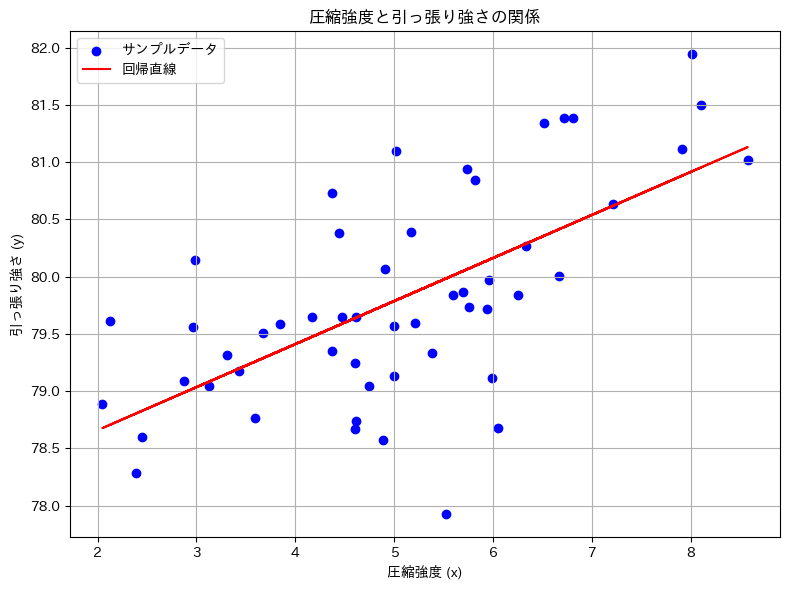

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 仮のサンプルデータ生成（相関係数 ≈ 0.696 を持つように）
np.random.seed(42)
x = np.random.normal(loc=mean_x_calc, scale=np.sqrt(S_xx_calc / (n - 1)), size=n)
# y は x と相関を持たせて生成（回帰係数などは仮定）
slope = r * (np.sqrt(S_yy / S_xx_calc))
intercept = mean_y_calc - slope * mean_x_calc
y = intercept + slope * x + np.random.normal(scale=np.sqrt(S_yy * (1 - r**2) / (n - 2)), size=n)

# 相関係数を計算
r = np.corrcoef(x, y)[0, 1]
print(f"相関係数 r = {r:.3f}")

# 相関係数とp値を取得
r, p_value = pearsonr(x, y)
print(f"相関係数 r = {r:.3f}")
print("p値 =", p_value)

# 回帰直線のパラメータ
m, b = np.polyfit(x, y, 1)

# グラフの描画
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", label="サンプルデータ")
plt.plot(x, m * x + b, color="red", label="回帰直線")
plt.title("圧縮強度と引っ張り強さの関係")
plt.xlabel("圧縮強度 (x)")
plt.ylabel("引っ張り強さ (y)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 15.4

製品HKの製造工程において、水分含有量と不純物量は重要な管理項目となっている。最近の生産品より、ランダムに $ n = 32 $ のサンプルを抜き取り、それぞれのサンプルから水分含有量 (x) と不純物量 (y) を測定したところ、以下の統計量が得られた。

水分含有量 (x) と不純物量 (y) の間に直線関係が存在するか否か、回帰分析を行え。有意水準５％とする。またその時の直線式（母回帰式）を推定せよ。


En el proceso de fabricación del producto HK, el contenido de humedad y la cantidad de impurezas son elementos de control importantes. Recientemente, se extrajo una muestra aleatoria de $ n = 32 $ unidades de la producción y se medió el contenido de humedad (x) y la cantidad de impurezas (y) de cada muestra, obteniéndose los siguientes estadísticos. Realice un análisis de regresión para determinar si existe una relación lineal entre el contenido de humedad (x) y la cantidad de impurezas (y). Utilice un nivel de significancia del 5%. Además, estime la ecuación de la recta (ecuación de regresión poblacional) en esse caso.

n = 32,

$ \sum x = 164.00 \qquad \sum x^2 = 950.00 \qquad \bar{x}  = 5.125  \qquad S_{xx} = 109.50 $

$ \sum y = 1280.0 \qquad \sum y^2 = 147.00 \qquad \bar{y}= 40.00 \qquad S_{yy} = 97.00 $

$ \sum xy = 746.00 \qquad S_{xy} = 90.00$

$ \alpha = 0.05 $

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import statsmodels.formula.api as smf

# Estadístico de prueba dado
n = 32
sum_x = 164.0
sum_xx = 950.0
x_bar = 5.125
Sxx = 109.50
sum_y = 1280.0
sum_yy = 147.0
y_bar = 40.0
Syy = 97.00
sum_xy = 746.0
Sxy = 90.00

Paso 1: Estructura de los datos

$ y = \beta_0 + \beta_1 x + \epsilon $

Paso 2: Establecimiento de la hipótesis

$ H_0 : \beta_1 = 0 \qquad H_1 \neq 0 $

Paso 3: Establecimiento del nivel de significancia

$ \alpha = 0.05 $


In [ ]:
alpha = 0.05

Paso 4: Establecimiento de la region de rechazo

$ R: |r| \geq t(\phi,\alpha) = t(30,0.05) = 2.042 $

In [ ]:
# Cálculo de la región de rechazo
df = n - 2
t_critical = stats.t.ppf(1 - alpha/2, df)

print(f"Grados de libertad df: {df}")
print(f"Región de rechazo R: {t_critical:.3f}")

Grados de libertad df: 30
Región de rechazo R: 2.042


Paso 5: Cálculo del estadístico de prueba

$ S_{xx} = 109.05 \qquad S_{yy} = 97.00 \qquad S_{xy} = 90.00 $

Suma de cuadrados de los residuos (SCR) $ S_{\epsilon} $

$ S_{\epsilon} = S_{yy} - (S_{xy})^2 / S_{xx} = 23.00 $

Vaianza residual $ V_{\epsilon} $

$ V_{\epsilon} = S_{\epsilon} / (n-2) = 0.77 $

Cálculo del estadístico de prueba

$ t_0 = S_{xy} / \sqrt{S_{xx} V_{\epsilon}} = 9.81 $


In [ ]:
# Cálculo de la suma de cuadrado de los residuos (SCR)
RSS = Syy - (Sxy ** 2 / Sxx)

# Cálculo de la varianza residual
residual_variance = RSS / (n - 2)

# Prueba t para el coeficiente de regresión
SE_b1 = np.sqrt((Syy - SSR) / (n - 2) / Sxx)
t_stat = b1 / SE_b1
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

print(f"Suma de cuadrado delos residuos (RSS): {RSS:.2f}")
print(f"Valianza residual: {residual_variance:.2f}")
print(f"Prueba t: {t_stat:.2f}")

NameError: name 'SSR' is not defined

Paso 6: Prueba de hipótesis

In [ ]:
# Determinación de la existencia de una relación lineal
if np.abs(t_stat) > t_critical:
    print("Existe una relación lineal significativa entre el cotenido de humedad (x) \ny la cantidad de impurezas (y)")
else:
    print("No existe una relación lineal significativa entre el contenido de humedad (x) \ny la cantidad de impurezas (y)")

Paso 7:

In [ ]:
# Cálculo del coeficiente de regresión
b1 = Sxy / Sxx
b0 = y_bar - b1 * x_bar

# Cálculo del coeficiente de determinación R^2
SSR = b1 ** 2 * Sxx
SST = Syy
R2 = SSR / SST

# 分析結果の出力
print(f"Recta de regresión: y = {b0:.2f} + {b1:.1f}x")
print(f"Coeficiente de determinación R^2: {R2:.2f}")

if R2 > 0.7:
  print("Se considera que el modelo se ajusta bien.")
elif R2 > 0.4:
  print("Se considera que el modelo se ajusta relativamente bien.")
elif R2 > 0.2:
  print("El modelo explica parte de la variación de los datos, pero hay margen de mejora.")
else:
  print("Se considera que el modelo apenas explica la variación de los datos.")

In [ ]:
# サンプルデータの生成
x_values = np.linspace(x_bar - 3*np.sqrt(Sxx/n), x_bar + 3*np.sqrt(Sxx/n), n)
y_values = b0 + b1 * x_values + np.random.normal(scale=np.sqrt(Syy/(n-2)), size=n)

# 散布図の描画
x = x_values
y = y_values

print("\nサンプルデータから求めた統計量:")
# F検定
f_val, p_val = f_oneway(x, y)

#相関係数の算出
correlation = np.corrcoef(x,y)[0,1]
print(f"相関係数：{correlation:.3f}")

# データフレームの作成
df = pd.DataFrame({'x': x, 'y': y})

# 回帰分析の実行
model = smf.ols('y ~ x', data=df).fit()

# 回帰直線の係数を取得
b00 = model.params['Intercept']
b11 = model.params['x']

print(f"回帰直線: y = {b00:.2f} + {b11:.2f}x")

# プロット
plt.figure(figsize=(8, 6))

# 回帰直線のプロット
plt.plot(x_values, b0 + b1 * x_values, color='red', label=f'Regresión lineal: y = {b0:.2f} + {b1:.2f}x')

# サンプルデータのプロット
plt.scatter(x_values, y_values, color='blue', label='Datos de muestra')

plt.xlabel('Contenido de humedad (x)')
plt.ylabel('Cantidad de impurezas (y)')
plt.title('Análisis de Regresión entre Contenido de Humedad e Impurezas')
plt.legend()
plt.grid(True)
plt.show()

##15.5

15.4 のデータを用いて、水分含有量 (x) と不純物 (y) の間に直線関係が存在するかどうか、分散分析表を作成して検討せよ。

Utilizando los datos de 15.4, elabora una tabla de análisis de varianza para examinar si existe una relación lineal entre el contenido de humedad (x) y las impurezas (y)

In [ ]:
# Estadístico de prueba dado
n = 32
x_bar = 5.125
Sxx = 109.50
Syy = 97.00
Sxy = 90.00

# Cálculo del coeficiente re regresión
b1 = Sxy / Sxx
b0 = y_bar - b1 * x_bar

# Suma de cuadrados total (SST)
SST = Syy

# Suma de cuadrados de la regresión (SSR)
SSR = b1 * Sxy

# Suma de cuadrados de los residuos (SSE)
SSE = SST - SSR

# Grados de libertad
df_total = n - 1
df_regression = 1
df_residual = n - 2

# Cuadrado medio
MSR = SSR / df_regression
MSE = SSE / df_residual

# Value F
F_value = MSR / MSE



# Elaboración de la tabla de análisis de varianza (ANOVA)
anova_table = pd.DataFrame({
    'Fuente de variación': ['Regresión', 'Residuo', 'Total'],
    'Suma de cuadrados (SS)': [SSR, SSE, SST],
    'Grados de libertad (df)': [df_regression, df_residual, df_total],
    'Cuadrado medio (MS)': [MSR, MSE, np.nan],
    'Valor F': [F_value, np.nan, np.nan]
})
anova_table = anova_table.round(3)
anova_table = anova_table.set_index('Fuente de variación')

# 結果の表示
print(f"Ecuación de regresión: y = {b0:.2f} + {b1:.2f}x")
print("\nTabla de análisis de varianza (ANOVA):")
anova_table

Como resultado del análisis de varianza,

$ F_0 = 96.3 > F(1,30:0.05) = 4.17 $

con un nivel de significancia del 5%, la variación debido a la regresión es eignificativa. Es decir, existe una relación lineal entre el contenido de humedad (x) y la cantidad de impuezas (y).

In [ ]:
from scipy.stats import f

# Grados de libertad
df1 = df_regression
df2 = df_residual
alpha = alpha

f_critical = f.ppf(1 - alpha, df1, df2)

print(f"F0 = {F_value:.4f}")
print(f"F({df1}, {df2}; {alpha}) = {f_critical:.4f}")

# Cálculo del coeficiente de determinación
contribution_ratio = SSR / SST * 100

print(f"\nCoeficiente de determinación: {contribution_ratio:.2f}%")

In [ ]:
# 問題で与えられたデータの検算

import numpy as np

# 与えられたデータ
n = 32
sum_x = 164.00
sum_xx = 950.00
mean_x = 5.125
S_xx_given = 109.5

sum_y = 1280.0
sum_yy = 147.0
mean_y = 40
S_yy_given = 97

sum_xy = 746
S_xy_given = 90

# 検算
mean_x_calc = sum_x / n
mean_y_calc = sum_y / n

S_xx_calc = sum_xx - n * mean_x_calc**2
S_yy_calc = sum_yy - n * mean_y_calc**2
S_xy_calc = sum_xy - n * mean_x_calc * mean_y_calc

mean_x_calc, mean_y_calc, S_xx_calc, S_yy_calc, S_xy_calc, S_xx_given, S_yy_given, S_xy_given


##問題が間違っている

はい、あなたの指摘通り、sum_y = 1280.0 と sum_yy = 147.0 という値は不自然です。これは、sum_yy が y 値の平方和であることを考えると、sum_y の値と比較して非常に小さいです。通常、 sum_yy は sum_y^2 よりも大きい値になります。

おそらく、sum_yy の値は誤りであり、実際の値はもっと大きいはずです。適切な sum_yy の値を設定するためには、以下のように調整できます：

y の平均 y_bar = 40.0 を基にして適切な y の分散を推定し、その結果として sum_yy を計算します。
y の分散 Syy = 97.00 から適切な sum_yy を推定します。
例えば、 y の分散を基に sum_yy を推定すると以下のようになります：

sum_yy の適切な値を計算

var_y = Syy / (n - 1)

sum_yy = n * (var_y + y_bar**2)


In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import f_oneway
import statsmodels.formula.api as smf

import numpy as np
from scipy.optimize import minimize

# 目標統計量
n = 32
sum_x_target = 164.0
sum_xx_target = 950.0
x_bar_target = 5.125
Sxx_target = 109.50
sum_y_target = 1280.0
sum_yy_target = 147.0
y_bar_target = 40.0
Syy_target = 97.00
sum_xy_target = 746.0
Sxy_target = 90.00


# 初期データの生成
np.random.seed(0)
x_initial = np.random.normal(loc=x_bar_target, scale=5, size=n)
y_initial = np.random.normal(loc=y_bar_target, scale=5, size=n)



# 誤差関数の定義
def objective(vars):
    x, y = vars[:n], vars[n:]

    # 現在の統計量
    sum_x = np.sum(x)
    sum_xx = np.sum(x**2)
    sum_y = np.sum(y)
    sum_xy = np.sum(x*y)

    x_bar = sum_x / n
    y_bar = sum_y / n
    Sxx = sum_xx - n * x_bar**2
    Syy = np.sum(y**2) - n * y_bar**2
    Sxy = sum_xy - n * x_bar * y_bar

    # 誤差計算（重み付けを強化）
    error = (sum_x - sum_x_target)**2 + (sum_xx - sum_xx_target)**2 + \
            10*(x_bar - x_bar_target)**2 + 10*(y_bar - y_bar_target)**2 + \
            (Sxx - Sxx_target)**2 + (sum_y - sum_y_target)**2 + \
            (Syy - Syy_target)**2 + (Sxy - Sxy_target)**2

    return error

# 制約条件の定義
def constraint(vars):
    x, y = vars[:n], vars[n:]
    x_bar = np.sum(x) / n
    y_bar = np.sum(y) / n
    return [x_bar - x_bar_target, y_bar - y_bar_target]

# 制約を定義（非線形制約）
constraints = [{'type': 'eq', 'fun': constraint}]

# 最適化
initial_guess = np.concatenate([x_initial, y_initial])
result = minimize(objective, initial_guess, method='SLSQP', constraints=constraints)

# 最適化された x, y データ
optimized_data = result.x
x_optimized = optimized_data[:n]
y_optimized = optimized_data[n:]

# 統計量の確認
sum_x = np.sum(x_optimized)
sum_xx = np.sum(x_optimized**2)
x_bar = sum_x / n
Sxx = sum_xx - n * x_bar**2

sum_y = np.sum(y_optimized)
y_bar = sum_y / n
Syy = np.sum(y_optimized**2) - n * y_bar**2
sum_xy = np.sum(x_optimized * y_optimized)
Sxy = sum_xy - n * x_bar * y_bar


x = x_optimized
y = y_optimized

# F検定
f_val, p_val = f_oneway(x, y)

#相関係数の算出
correlation = np.corrcoef(x,y)[0,1]

print(f"相関係数：{correlation:.3f}")


# データフレームの作成
df = pd.DataFrame({'x': x, 'y': y})

# 回帰分析の実行
model = smf.ols('y ~ x', data=df).fit()

# 回帰直線の係数を取得
b0 = model.params['Intercept']
b1 = model.params['x']



# プロット
plt.figure(figsize=(12, 6))

# 回帰直線のプロット
plt.plot(x, b0 + b1 * x, color='red', label=f'Regresión lineal: y = {b0:.2f} + {b1:.2f}x')

# サンプルデータのプロット
plt.scatter(x, y, color='blue', label='Datos de muestra')

plt.xlabel('Contenido de humedad (x)')
plt.ylabel('Cantidad de impurezas (y)')
plt.title('Análisis de Regresión entre Contenido de Humedad e Impurezas')
plt.legend()
plt.grid(True)
plt.show()


# 回帰係数の計算
b1 = Sxy_target / Sxx_target
b0 = y_bar_target - b1 * x_bar_target

# 決定係数 R^2 の計算
SSR = b1 ** 2 * Sxx_target
SST = Syy_target
R2 = SSR / SST

# 回帰係数のt検定
SE_b1 = np.sqrt((Syy_target - SSR) / (n - 2) / Sxx)
t_stat = b1 / SE_b1
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))

# 棄却域の計算
alpha = 0.05
df = n - 2
t_critical = stats.t.ppf(1 - alpha/2, df)

# 分析結果の出力
print(f"回帰直線: y = {b0:.2f} + {b1:.2f}x")
print(f"決定係数 R^2: {R2:.2f}")

if R2 > 0.7:
  print("モデルがよくフィットしていると考えられる")
elif R2 > 0.4:
  print("モデルが比較的よくフィットしていると考えられる")
elif R2 > 0.2:
  print("モデルがデータの一部の変動を説明しているが、改良の余地がある")
else:
  print("モデルがデータの変動をほとんど説明していないと考えられる")

print(f"回帰係数のt検定統計量: {t_stat:.2f}")
print(f"回帰係数のp値: {p_value:.4f}")

print(f"t統計量: {t_stat:.2f}")
print(f"p値: {p_value:.4f}")
print(f"棄却域の臨界値: ±{t_critical:.2f}")


# 残差平方和 (RSS) の計算
RSS = Syy - (Sxy ** 2 / Sxx)

# 残差分散の計算
# 自由度 (n-2) で除算
residual_variance = RSS / (n - 2)

print(f"残差平方和 (RSS): {RSS:.2f}")
print(f"残差分散: {residual_variance:.2f}")
print(f"相関係数：{correlation:.3f}")

# 直線関係の有無の判定
if np.abs(t_stat) > t_critical:
    print("水分含有量（x）と不純物量（y）の間には有意な直線関係が存在します。")
else:
    print("水分含有量（x）と不純物量（y）の間には有意な直線関係が存在しません。")


# 結果の表示
print("調整後の統計量:")
print(f"sum_x = {np.sum(x):.4f}, target = {sum_x_target}")
print(f"sum_xx = {np.sum(x**2):.4f}, target = {sum_xx_target}")
print(f"x_bar = {np.mean(x):.4f}, target = {x_bar_target}")
print(f"Sxx = {np.sum((x - np.mean(x))**2):.4f}, target = {Sxx_target}")
print(f"sum_y = {np.sum(y):.4f}, target = {sum_y_target}")
print(f"sum_yy = {np.sum(y**2):.4f}, target = {sum_yy_target}")
print(f"y_bar = {np.mean(y):.4f}, target = {y_bar_target}")
print(f"Syy = {np.sum((y - np.mean(y))**2):.4f}, target = {Syy_target}")
print(f"sum_xy = {np.sum(x * y):.4f}, target = {sum_xy_target}")
print(f"Sxy = {np.sum((x - np.mean(x)) * (y - np.mean(y))):.4f}, target = {Sxy_target}")





In [ ]:
import numpy as np
from scipy import stats

# 統計量の計算
x_bar = np.mean(x_optimized)
y_bar = np.mean(y_optimized)

Sxx = np.sum((x_optimized - x_bar) ** 2)
Syy = np.sum((y_optimized - y_bar) ** 2)
Sxy = np.sum((x_optimized - x_bar) * (y_optimized - y_bar))

# 回帰係数の計算
b1 = Sxy / Sxx
b0 = y_bar - b1 * x_bar

# 回帰直線の予測値
y_hat = b0 + b1 * x_optimized

# 分散分析表の要素計算
SSR = np.sum((y_hat - y_bar) ** 2)  # 回帰による平方和
SSE = np.sum((y_optimized - y_hat) ** 2)  # 残差平方和
SST = Syy  # 全体平方和
R2 = SSR / SST  # 決定係数

# 自由度
df_regression = 1
df_residual = n - 2
df_total = n - 1

# 平均平方
MSR = SSR / df_regression
MSE = SSE / df_residual

# F値の計算
F_value = MSR / MSE

# p値の計算
p_value = 1 - stats.f.cdf(F_value, df_regression, df_residual)

# 寄与率 (R^2)
R_squared = SSR / SST

# 分析結果の出力
print(f"回帰直線: y = {b0:.2f} + {b1:.2f}x")
print(f"決定係数（寄与率） R^2: {R2:.2f}")


# 分散分析表の作成
anova_table = pd.DataFrame({
    '変動の要因': ['回帰', '残差', '全体'],
    '平方和 (SS)': [SSR, SSE, SST],
    '自由度 (df)': [df_regression, df_residual, df_total],
    '平均平方 (MS)': [MSR, MSE, np.nan],
    'F値': [F_value, np.nan, np.nan]
})



# 有意水準5%での検定
alpha = 0.05
if p_value < alpha:
    print("結論: p値が有意水準5%未満であるため、xとyの間には直線関係が存在すると結論付けられます。")
else:
    print("結論: p値が有意水準5%以上であるため、xとyの間には直線関係が存在しないと結論付けられます。")

# 寄与率の出力
# print(f"寄与率 (R^2): {R_squared:.3f}")


# 結果の表示
anova_table

